#### 1. Data collection
- Library를 모두 한 번에 import할 수 있도록 정리하였습니다.

In [ ]:
import FinanceDataReader as fdr
import pandas as pd
import html5lib
import numpy as np
import os
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from xgboost import XGBRegressor
import xgboost
from catboost import CatBoostRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import math
from xgboost.sklearn import XGBRegressor
from sklearn.model_selection import GridSearchCV
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, LSTM, Conv1D, Lambda
from keras.losses import Huber
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping, ModelCheckpoint

In [102]:
# KOSPI index, 2010 ~ Now
kospi = fdr.DataReader('KS11', '2009-01-01', '2020-05-19')

# Indexes, 2010 ~ Now
dji = fdr.DataReader('DJI', '2009-01-01', '2020-05-19') # Dow Jones Industrial(DJI)
sp500 = fdr.DataReader('US500', '2009-01-01', '2020-05-19') # S&P 500 지수 (NYSE)

# FX 환율, 2010 ~ 현재
usdkrw = fdr.DataReader('USD/KRW', '2009-01-01', '2020-05-19') # 달러 원화
usdeur = fdr.DataReader('USD/EUR', '2009-01-01', '2020-05-19') # 달러 유로화
usdcny = fdr.DataReader('USD/CNY', '2009-01-01', '2020-05-19') # 달러 위엔화

# 상품 선물 가격 데이터
gold = fdr.DataReader('ZG', '2009-01-01', '2020-05-19') # 금 선물 (ICE)

# 채권 수익률
kr1yt = fdr.DataReader('KR1YT=RR', '2009-01-01', '2020-05-19') # 1년만기 한국국채 수익률
kr10yt = fdr.DataReader('KR10YT=RR', '2009-01-01', '2020-05-19') # 10년만기 한국국채 수익률
us1yt = fdr.DataReader('US1MT=X', '2009-01-01', '2020-05-19') # 1개월 만기 미국국채 수익률
us10yt = fdr.DataReader('US10YT=X', '2009-01-01', '2020-05-19') # 10년 만기 미국국채 수익률

# FRED 데이터
nasdaq = fdr.DataReader('NASDAQCOM', '2009-01-01', '2020-05-19', data_source='fred') # NASDAQCOM 나스닥종합지수
# hou_nas = fdr.DataReader(['HSN1F', 'NASDAQCOM'], data_source='fred') # HSN1F 주택판매지수, NASDAQCOM 나스닥종합지수

# 한국 주식
samsung = fdr.DataReader('005930', '2009-01-01', '2020-05-19')
skhynix = fdr.DataReader('000660', '2009-01-01', '2020-05-19')
naver = fdr.DataReader('035420', '2009-01-01', '2020-05-19')
kakao = fdr.DataReader('035720', '2009-01-01', '2020-05-19')
celltrion = fdr.DataReader('068270', '2009-01-01', '2020-05-19')

#### 2. Preprocessing

In [103]:
kospi_m = pd.DataFrame(data=kospi.Close.values, columns=['kospi'], index=kospi.index)
dji_m = pd.DataFrame(data=dji.Close.values, columns=['dji'], index=dji.index)
sp500_m = pd.DataFrame(data=sp500.Close.values, columns=['sp500'], index=sp500.index)

usdkrw_m = pd.DataFrame(data=usdkrw.Close.values, columns=['usdkrw'], index=usdkrw.index)
usdeur_m = pd.DataFrame(data=usdeur.Close.values, columns=['usdeur'], index=usdeur.index)
usdcny_m = pd.DataFrame(data=usdcny.Close.values, columns=['usdcny'], index=usdcny.index)

gold_m = pd.DataFrame(data=gold.Close.values, columns=['gold'], index=gold.index)

kr1yt_m = pd.DataFrame(data=kr1yt.Close.values, columns=['kr1yt'], index=kr1yt.index)
kr10yt_m = pd.DataFrame(data=kr10yt.Close.values, columns=['kr10yt'], index=kr10yt.index)
us1yt_m = pd.DataFrame(data=us1yt.Close.values, columns=['us1yt'], index=us1yt.index)
us10yt_m = pd.DataFrame(data=us10yt.Close.values, columns=['us10yt'], index=us10yt.index)

nasdaq_m = pd.DataFrame(data=nasdaq.NASDAQCOM.values, columns=['nasdaq'], index=nasdaq.index)

samsung_m = pd.DataFrame(data=samsung.Close.values, columns=['samsung'], index=samsung.index)
skhynix_m = pd.DataFrame(data=skhynix.Close.values, columns=['skhynix'], index=skhynix.index)
naver_m = pd.DataFrame(data=naver.Close.values, columns=['naver'], index=naver.index)
kakao_m = pd.DataFrame(data=kakao.Close.values, columns=['kakao'], index=kakao.index)
celltrion_m = pd.DataFrame(data=celltrion.Close.values, columns=['celltrion'], index=celltrion.index)

# 이동평균

In [120]:
df_samsung_SMA_5 = samsung_m.rolling(5).mean()
df_skhynix_SMA_5 = skhynix_m.rolling(5).mean()
df_naver_SMA_5 = naver_m.rolling(5).mean()
df_kakao_SMA_5 = kakao_m.rolling(5).mean()
df_celltrion_SMA_5 = celltrion_m.rolling(5).mean()
df_usdkrw_SMA_5 = usdkrw_m.rolling(5).mean()
df_zg_SMA_5 = gold_m.rolling(5).mean()
df_dji_SMA_5 = dji_m.rolling(5).mean()
df_ks11_SMA_5 = kospi_m.rolling(5).mean()


df_samsung_SMA_20 = samsung_m.rolling(20).mean()
df_skhynix_SMA_20 = skhynix_m.rolling(20).mean()
df_naver_SMA_20 = naver_m.rolling(20).mean()
df_kakao_SMA_20 = kakao_m.rolling(20).mean()
df_celltrion_SMA_20 = celltrion_m.rolling(20).mean()
df_usdkrw_SMA_20 = usdkrw_m.rolling(20).mean()
df_zg_SMA_20 = gold_m.rolling(20).mean()
df_dji_SMA_20 = dji_m.rolling(20).mean()
df_ks11_SMA_20 = kospi_m.rolling(20).mean()


df_samsung_SMA_100 = samsung_m.rolling(100).mean()
df_skhynix_SMA_100 = skhynix_m.rolling(100).mean()
df_naver_SMA_100 = naver_m.rolling(100).mean()
df_kakao_SMA_100 = kakao_m.rolling(100).mean()
df_celltrion_SMA_100 = celltrion_m.rolling(100).mean()
df_usdkrw_SMA_100 = usdkrw_m.rolling(100).mean()
df_zg_SMA_100 = gold_m.rolling(100).mean()
df_dji_SMA_100 = dji_m.rolling(100).mean()
df_ks11_SMA_100 = kospi_m.rolling(100).mean()


df_samsung_SMA_200 = samsung_m.rolling(200).mean()
df_skhynix_SMA_200 = skhynix_m.rolling(200).mean()
df_naver_SMA_200 = naver_m.rolling(200).mean()
df_kakao_SMA_200 = kakao_m.rolling(200).mean()
df_celltrion_SMA_200 = celltrion_m.rolling(200).mean()
df_usdkrw_SMA_200 = usdkrw_m.rolling(200).mean()
df_zg_SMA_200 = gold_m.rolling(200).mean()
df_dji_SMA_200 = dji_m.rolling(200).mean()
df_ks11_SMA_200 = kospi_m.rolling(200).mean()


df_samsung_EMA_5 = samsung_m.ewm(5).mean()
df_skhynix_EMA_5 = skhynix_m.ewm(5).mean()
df_naver_EMA_5 = naver_m.ewm(5).mean()
df_kakao_EMA_5 = kakao_m.ewm(5).mean()
df_celltrion_EMA_5 = celltrion_m.ewm(5).mean()
df_usdkrw_EMA_5 = usdkrw_m.ewm(5).mean()
df_zg_EMA_5 = gold_m.ewm(5).mean()
df_dji_EMA_5 = dji_m.ewm(5).mean()
df_ks11_EMA_5 = kospi_m.ewm(5).mean()


df_samsung_EMA_20 = samsung_m.ewm(20).mean()
df_skhynix_EMA_20 = skhynix_m.ewm(20).mean()
df_naver_EMA_20 = naver_m.ewm(20).mean()
df_kakao_EMA_20 = kakao_m.ewm(20).mean()
df_celltrion_EMA_20 = celltrion_m.ewm(20).mean()
df_usdkrw_EMA_20 = usdkrw_m.ewm(20).mean()
df_zg_EMA_20 = gold_m.ewm(20).mean()
df_dji_EMA_20 = dji_m.ewm(20).mean()
df_ks11_EMA_20 = kospi_m.ewm(20).mean()


df_samsung_EMA_100 = samsung_m.ewm(100).mean()
df_skhynix_EMA_100 = skhynix_m.ewm(100).mean()
df_naver_EMA_100 = naver_m.ewm(100).mean()
df_kakao_EMA_100 = kakao_m.ewm(100).mean()
df_celltrion_EMA_100 = celltrion_m.ewm(100).mean()
df_usdkrw_EMA_100 = usdkrw_m.ewm(100).mean()
df_zg_EMA_100 = gold_m.ewm(100).mean()
df_dji_EMA_100 = dji_m.ewm(100).mean()
df_ks11_EMA_100 = kospi_m.ewm(100).mean()


df_samsung_EMA_200 = samsung_m.ewm(200).mean()
df_skhynix_EMA_200 = skhynix_m.ewm(200).mean()
df_naver_EMA_200 = naver_m.ewm(200).mean()
df_kakao_EMA_200 = kakao_m.ewm(200).mean()
df_celltrion_EMA_200 = celltrion_m.ewm(200).mean()
df_usdkrw_EMA_200 = usdkrw_m.ewm(200).mean()
df_zg_EMA_200 = gold_m.ewm(200).mean()
df_dji_EMA_200 = dji_m.ewm(200).mean()
df_ks11_EMA_200 = kospi_m.ewm(200).mean()

# Rename columns

In [121]:
df_samsung_EMA_5 = df_samsung_EMA_5.rename(columns={'samsung' : 'samsung_EMA_5'})
df_skhynix_EMA_5 = df_skhynix_EMA_5.rename(columns={'skhynix' : 'skhynix_EMA_5'})
df_naver_EMA_5 = df_naver_EMA_5.rename(columns={'naver' : 'naver_EMA_5'})
df_kakao_EMA_5 = df_kakao_EMA_5.rename(columns={'kakao' : 'kakao_EMA_5'})
df_celltrion_EMA_5 = df_celltrion_EMA_5.rename(columns={'celltrion' : 'celltrion_EMA_5'})
df_usdkrw_EMA_5 = df_usdkrw_EMA_5.rename(columns={'usdkrw' : 'usdkrw_EMA_5'})
df_zg_EMA_5 = df_zg_EMA_5.rename(columns={'gold' : 'zg_EMA_5'})
df_dji_EMA_5 = df_dji_EMA_5.rename(columns={'dji' : 'dji_EMA_5'})
df_ks11_EMA_5 = df_ks11_EMA_5.rename(columns={'kospi' : 'ks11_EMA_5'})


df_samsung_EMA_20 = df_samsung_EMA_20.rename(columns={'samsung' : 'samsung_EMA_20'})
df_skhynix_EMA_20 = df_skhynix_EMA_20.rename(columns={'skhynix' : 'skhynix_EMA_20'})
df_naver_EMA_20 = df_naver_EMA_20.rename(columns={'naver' : 'naver_EMA_20'})
df_kakao_EMA_20 = df_kakao_EMA_20.rename(columns={'kakao' : 'kakao_EMA_20'})
df_celltrion_EMA_20 = df_celltrion_EMA_20.rename(columns={'celltrion' : 'celltrion_EMA_20'})
df_usdkrw_EMA_20 = df_usdkrw_EMA_20.rename(columns={'usdkrw' : 'usdkrw_EMA_20'})
df_zg_EMA_20 = df_zg_EMA_20.rename(columns={'gold' : 'zg_EMA_20'})
df_dji_EMA_20 = df_dji_EMA_20.rename(columns={'dji' : 'dji_EMA_20'})
df_ks11_EMA_20 = df_ks11_EMA_20.rename(columns={'kospi' : 'ks11_EMA_20'})


df_samsung_EMA_100 = df_samsung_EMA_100.rename(columns={'samsung' : 'samsung_EMA_100'})
df_skhynix_EMA_100 = df_skhynix_EMA_100.rename(columns={'skhynix' : 'skhynix_EMA_100'})
df_naver_EMA_100 = df_naver_EMA_100.rename(columns={'naver' : 'naver_EMA_100'})
df_kakao_EMA_100 = df_kakao_EMA_100.rename(columns={'kakao' : 'kakao_EMA_100'})
df_celltrion_EMA_100 = df_celltrion_EMA_100.rename(columns={'celltrion' : 'celltrion_EMA_100'})
df_usdkrw_EMA_100 = df_usdkrw_EMA_100.rename(columns={'usdkrw' : 'usdkrw_EMA_100'})
df_zg_EMA_100 = df_zg_EMA_100.rename(columns={'gold' : 'zg_EMA_100'})
df_dji_EMA_100 = df_dji_EMA_100.rename(columns={'dji' : 'dji_EMA_100'})
df_ks11_EMA_100 = df_ks11_EMA_100.rename(columns={'kospi' : 'ks11_EMA_100'})


df_samsung_EMA_200 = df_samsung_EMA_200.rename(columns={'samsung' : 'samsung_EMA_200'})
df_skhynix_EMA_200 = df_skhynix_EMA_200.rename(columns={'skhynix' : 'skhynix_EMA_200'})
df_naver_EMA_200 = df_naver_EMA_200.rename(columns={'naver' : 'naver_EMA_200'})
df_kakao_EMA_200 = df_kakao_EMA_200.rename(columns={'kakao' : 'kakao_EMA_200'})
df_celltrion_EMA_200 = df_celltrion_EMA_200.rename(columns={'celltrion' : 'celltrion_EMA_200'})
df_usdkrw_EMA_200 = df_usdkrw_EMA_200.rename(columns={'usdkrw' : 'usdkrw_EMA_200'})
df_zg_EMA_200 = df_zg_EMA_200.rename(columns={'gold' : 'zg_EMA_200'})
df_dji_EMA_200 = df_dji_EMA_200.rename(columns={'dji' : 'dji_EMA_200'})
df_ks11_EMA_200 = df_ks11_EMA_200.rename(columns={'kospi' : 'ks11_EMA_200'})


df_samsung_SMA_5 = df_samsung_SMA_5.rename(columns={'samsung' : 'samsung_SMA_5'})
df_skhynix_SMA_5 = df_skhynix_SMA_5.rename(columns={'skhynix' : 'skhynix_SMA_5'})
df_naver_SMA_5 = df_naver_SMA_5.rename(columns={'naver' : 'naver_SMA_5'})
df_kakao_SMA_5 = df_kakao_SMA_5.rename(columns={'kakao' : 'kakao_SMA_5'})
df_celltrion_SMA_5 = df_celltrion_SMA_5.rename(columns={'celltrion' : 'celltrion_SMA_5'})
df_usdkrw_SMA_5 = df_usdkrw_SMA_5.rename(columns={'usdkrw' : 'usdkrw_SMA_5'})
df_zg_SMA_5 = df_zg_SMA_5.rename(columns={'gold' : 'zg_SMA_5'})
df_dji_SMA_5 = df_dji_SMA_5.rename(columns={'dji' : 'dji_SMA_5'})
df_ks11_SMA_5 = df_ks11_SMA_5.rename(columns={'kospi' : 'ks11_SMA_5'})


df_samsung_SMA_20 = df_samsung_SMA_20.rename(columns={'samsung' : 'samsung_SMA_20'})
df_skhynix_SMA_20 = df_skhynix_SMA_20.rename(columns={'skhynix' : 'skhynix_SMA_20'})
df_naver_SMA_20 = df_naver_SMA_20.rename(columns={'naver' : 'naver_SMA_20'})
df_kakao_SMA_20 = df_kakao_SMA_20.rename(columns={'kakao' : 'kakao_SMA_20'})
df_celltrion_SMA_20 = df_celltrion_SMA_20.rename(columns={'celltrion' : 'celltrion_SMA_20'})
df_usdkrw_SMA_20 = df_usdkrw_SMA_20.rename(columns={'usdkrw' : 'usdkrw_SMA_20'})
df_zg_SMA_20 = df_zg_SMA_20.rename(columns={'gold' : 'zg_SMA_20'})
df_dji_SMA_20 = df_dji_SMA_20.rename(columns={'dji' : 'dji_SMA_20'})
df_ks11_SMA_20 = df_ks11_SMA_20.rename(columns={'kospi' : 'ks11_SMA_20'})


df_samsung_SMA_100 = df_samsung_SMA_100.rename(columns={'samsung' : 'samsung_SMA_100'})
df_skhynix_SMA_100 = df_skhynix_SMA_100.rename(columns={'skhynix' : 'skhynix_SMA_100'})
df_naver_SMA_100 = df_naver_SMA_100.rename(columns={'naver' : 'naver_SMA_100'})
df_kakao_SMA_100 = df_kakao_SMA_100.rename(columns={'kakao' : 'kakao_SMA_100'})
df_celltrion_SMA_100 = df_celltrion_SMA_100.rename(columns={'celltrion' : 'celltrion_SMA_100'})
df_usdkrw_SMA_100 = df_usdkrw_SMA_100.rename(columns={'usdkrw' : 'usdkrw_SMA_100'})
df_zg_SMA_100 = df_zg_SMA_100.rename(columns={'gold' : 'zg_SMA_100'})
df_dji_SMA_100 = df_dji_SMA_100.rename(columns={'dji' : 'dji_SMA_100'})
df_ks11_SMA_100 = df_ks11_SMA_100.rename(columns={'kospi' : 'ks11_SMA_100'})


df_samsung_SMA_200 = df_samsung_SMA_200.rename(columns={'samsung' : 'samsung_SMA_200'})
df_skhynix_SMA_200 = df_skhynix_SMA_200.rename(columns={'skhynix' : 'skhynix_SMA_200'})
df_naver_SMA_200 = df_naver_SMA_200.rename(columns={'naver' : 'naver_SMA_200'})
df_kakao_SMA_200 = df_kakao_SMA_200.rename(columns={'kakao' : 'kakao_SMA_200'})
df_celltrion_SMA_200 = df_celltrion_SMA_200.rename(columns={'celltrion' : 'celltrion_SMA_200'})
df_usdkrw_SMA_200 = df_usdkrw_SMA_200.rename(columns={'usdkrw' : 'usdkrw_SMA_200'})
df_zg_SMA_200 = df_zg_SMA_200.rename(columns={'gold' : 'zg_SMA_200'})
df_dji_SMA_200 = df_dji_SMA_200.rename(columns={'dji' : 'dji_SMA_200'})
df_ks11_SMA_200 = df_ks11_SMA_200.rename(columns={'kospi' : 'ks11_SMA_200'})

In [122]:
x_columns = [kospi_m, dji_m, sp500_m, usdkrw_m, usdeur_m, usdcny_m, gold_m,
            kr1yt_m, kr10yt_m, us1yt_m, us10yt_m, nasdaq_m, samsung_m, skhynix_m,
            naver_m, kakao_m, celltrion_m, df_samsung_SMA_5, df_skhynix_SMA_5, df_naver_SMA_5, df_kakao_SMA_5, df_celltrion_SMA_5, df_usdkrw_SMA_5, df_zg_SMA_5, df_dji_SMA_5, df_ks11_SMA_5,
            df_samsung_SMA_20, df_skhynix_SMA_20, df_naver_SMA_20, df_kakao_SMA_20, df_celltrion_SMA_20, df_usdkrw_SMA_20, df_zg_SMA_20, df_dji_SMA_20, df_ks11_SMA_20,
            df_samsung_SMA_100, df_skhynix_SMA_100, df_naver_SMA_100, df_kakao_SMA_100, df_celltrion_SMA_100, df_usdkrw_SMA_100, df_zg_SMA_100, df_dji_SMA_100, df_ks11_SMA_100,
            df_samsung_SMA_200, df_skhynix_SMA_200, df_naver_SMA_200, df_kakao_SMA_200, df_celltrion_SMA_200, df_usdkrw_SMA_200, df_zg_SMA_200, df_dji_SMA_200, df_ks11_SMA_200,
            df_samsung_EMA_5, df_skhynix_EMA_5, df_naver_EMA_5, df_kakao_EMA_5, df_celltrion_EMA_5, df_usdkrw_EMA_5, df_zg_EMA_5, df_dji_EMA_5, df_ks11_EMA_5,
            df_samsung_EMA_20, df_skhynix_EMA_20, df_naver_EMA_20, df_kakao_EMA_20, df_celltrion_EMA_20, df_usdkrw_EMA_20, df_zg_EMA_20, df_dji_EMA_20, df_ks11_EMA_20,
            df_samsung_EMA_100, df_skhynix_EMA_100, df_naver_EMA_100, df_kakao_EMA_100, df_celltrion_EMA_100, df_usdkrw_EMA_100, df_zg_EMA_100, df_dji_EMA_100, df_ks11_EMA_100,
            df_samsung_EMA_200, df_skhynix_EMA_200, df_naver_EMA_200, df_kakao_EMA_200, df_celltrion_EMA_200, df_usdkrw_EMA_200, df_zg_EMA_200, df_dji_EMA_200, df_ks11_EMA_200]

In [123]:
df = pd.concat(x_columns, axis=1)

In [124]:
# df_dropna = df.dropna(axis=0, how='any')
df_dropna = df.fillna(method='ffill')

In [125]:
df_total = df_dropna.loc['2010-01-01':]
features = df_total.drop(['kospi'],axis=1)
targets = df_total[['kospi']]
features = features.loc[:'2020-05-18']
targets = targets.loc['2010-01-04':]

In [126]:
X_train, X_test, y_train, y_test = train_test_split(features, targets, test_size=0.19, random_state=0)

In [127]:
features

,dji,sp500,usdkrw,usdeur,usdcny,gold,kr1yt,kr10yt,us1yt,us10yt,nasdaq,samsung,skhynix,naver,kakao,celltrion,samsung_SMA_5,skhynix_SMA_5,naver_SMA_5,kakao_SMA_5,celltrion_SMA_5,usdkrw_SMA_5,zg_SMA_5,dji_SMA_5,ks11_SMA_5,samsung_SMA_20,skhynix_SMA_20,naver_SMA_20,kakao_SMA_20,celltrion_SMA_20,usdkrw_SMA_20,zg_SMA_20,dji_SMA_20,ks11_SMA_20,samsung_SMA_100,skhynix_SMA_100,naver_SMA_100,kakao_SMA_100,celltrion_SMA_100,usdkrw_SMA_100,zg_SMA_100,dji_SMA_100,ks11_SMA_100,samsung_SMA_200,skhynix_SMA_200,naver_SMA_200,kakao_SMA_200,celltrion_SMA_200,usdkrw_SMA_200,zg_SMA_200,dji_SMA_200,ks11_SMA_200,samsung_EMA_5,skhynix_EMA_5,naver_EMA_5,kakao_EMA_5,celltrion_EMA_5,usdkrw_EMA_5,zg_EMA_5,dji_EMA_5,ks11_EMA_5,samsung_EMA_20,skhynix_EMA_20,naver_EMA_20,kakao_EMA_20,celltrion_EMA_20,usdkrw_EMA_20,zg_EMA_20,dji_EMA_20,ks11_EMA_20,samsung_EMA_100,skhynix_EMA_100,naver_EMA_100,kakao_EMA_100,celltrion_EMA_100,usdkrw_EMA_100,zg_EMA_100,dji_EMA_100,ks11_EMA_100,samsung_EMA_200,skhynix_EMA_200,naver_EMA_200,kakao_EMA_200,celltrion_EMA_200,usdkrw_EMA_200,zg_EMA_200,dji_EMA_200,ks11_EMA_200
2010-01-01,10428.05,1115.10,1166.08,0.6981,6.8270,1095.2,3.380,5.400,0.0380,3.837,2269.150,15980.0,23150.0,60269.0,14110.0,12543.0,15784.0,22370.0,61273.4,14122.0,12525.8,1167.182,1099.00,10517.830,1676.906,15534.0,21102.5,61971.85,13232.70,12300.15,1168.4335,1121.320,10430.5745,1650.4830,15179.0,19994.5,56123.86,11077.64,12914.14,1186.5438,1050.536,9943.0709,1623.1096,13617.40,17138.40,55481.930,9540.275,13556.460,1231.02340,989.1900,9173.28945,1506.98425,15661.395999,21899.624934,61304.945944,13656.950352,12507.574088,1169.231337,1104.192146,10471.694002,1664.857453,15286.292589,20506.314488,60031.827631,12616.701758,12352.368887,1169.128431,1107.671101,10318.530719,1634.382054,14131.933731,17964.368574,55804.834300,10309.873410,12976.807933,1218.494838,1025.036178,9518.259595,1541.121397,13551.313218,16775.770296,54413.889064,9548.642740,13010.002323,1243.698589,999.744943,9218.168185,1491.474070
2010-01-04,10583.96,1132.99,1150.00,0.6937,6.8285,1117.7,3.470,5.420,0.0460,3.823,2308.420,16180.0,24100.0,60583.0,14732.0,13045.0,15884.0,22790.0,60896.8,14254.4,12584.4,1163.282,1101.72,10530.602,1683.864,15596.0,21347.5,62018.95,13332.05,12390.10,1168.0585,1116.335,10441.4650,1655.7085,15199.8,20049.5,56191.35,11131.43,12897.00,1185.4538,1052.140,9956.4960,1624.2789,13644.10,17211.00,55548.635,9585.035,13563.365,1229.78965,990.3005,9189.20525,1509.61025,15747.830000,22266.354112,61184.621620,13836.125294,12597.145073,1166.026114,1106.443455,10490.405002,1670.071211,15328.850261,20677.443080,60058.074044,12717.430664,12385.351458,1168.217551,1108.148670,10331.170264,1637.322921,14153.971740,18030.390410,55856.249266,10357.457252,12977.541707,1217.763246,1026.040500,9529.736918,1542.789459,13569.520706,16826.501265,54456.619151,9584.545046,13010.244733,1243.060574,1000.575210,9227.646873,1492.891680
2010-01-05,10572.02,1136.52,1140.20,0.6960,6.8268,1118.1,3.470,5.360,0.0360,3.763,2308.710,16440.0,23350.0,60583.0,14853.0,13212.0,16012.0,23000.0,60457.4,14391.0,12693.4,1157.922,1103.90,10535.590,1685.520,15659.0,21542.5,62011.10,13437.45,12473.70,1167.2575,1113.800,10450.6210,1659.4895,15225.6,20094.0,56268.26,11187.03,12880.28,1184.3758,1053.871,9968.6001,1625.5316,13671.40,17276.25,55605.140,9630.100,13569.425,1228.62040,991.3390,9205.67345,1512.06585,15863.191666,22446.961760,61084.351350,14005.604411,12699.620894,1161.721762,1108.386212,10504.007502,1673.496009,15381.762363,20804.708198,60083.070616,12819.124843,12424.715829,1166.883379,1108.622546,10342.639347,1639.860887,14178.549192,18087.582376,55907.067312,10405.789545,12980.062405,1216.935440,1027.037339,9540.952299,1544.378809,13589.364239,16871.598006,54498.970629,9620.965709,13011.639461,1242.361456,1001.400744,9236.958617,1494.258570
2010-01-06,10573.68,1137.14,1129.20,0.6938,6.8278,1135.9,3.440,5.380,0.0250,3.829,2301.090,16820.0,24550.0,60269.0,14913.0,13504.0,16228.0,23470.0,60520.2,14551.6,12952.6,11

### 2-2 Normalization

In [128]:
minMaxScaler = MinMaxScaler()
minMaxScaler.fit(X_train)
scaled_X_train = minMaxScaler.transform(X_train)

In [129]:
scaled_X_test = minMaxScaler.transform(X_test)

#### 3. Learning

- 3-1) XGBoost

In [130]:
xgb_model = xgboost.XGBRegressor(n_estimators=100, learning_rate=0.08, gamma=0, subsample=0.75,
                           colsample_bytree=1, max_depth=7)

In [131]:
xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.08, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=7, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

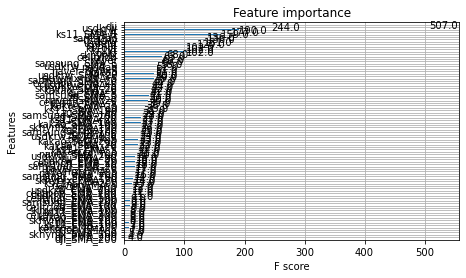

In [132]:
xgboost.plot_importance(xgb_model)

In [133]:
predictions = xgb_model.predict(X_test)
predictions

array([1978.3239, 1965.0352, 1930.8802, 1861.3378, 1969.9921, 1818.4559,
       1873.292 , 2040.2892, 2098.429 , 2045.7137, 2393.9753, 2010.9099,
       1909.5017, 2157.432 , 2287.4502, 2209.0479, 1878.5294, 1984.9393,
       1859.8502, 2051.471 , 2071.552 , 1908.2452, 1911.8119, 1614.0321,
       1976.0715, 2144.734 , 1982.5261, 1974.9376, 2010.8665, 1976.3243,
       1817.4911, 2178.9377, 1992.5674, 1842.8947, 1810.7227, 2075.1125,
       1923.1559, 1820.4453, 1999.2137, 1945.2938, 1848.9109, 2032.9574,
       2130.4077, 1913.2084, 2468.1384, 2296.0593, 1910.6743, 1977.158 ,
       1601.9985, 2540.517 , 2078.8628, 1997.8964, 2455.965 , 2133.1504,
       1937.0421, 1979.1659, 1959.6997, 2095.7131, 2160.904 , 2400.196 ,
       1893.0173, 2037.6478, 2089.782 , 2068.771 , 2251.3035, 1929.8439,
       2011.109 , 2366.8743, 1949.6787, 2031.0059, 2529.8503, 2011.8516,
       2497.4438, 2046.9954, 2071.871 , 2115.3284, 1908.3289, 2256.7605,
       1957.1421, 2067.0537, 1959.2268, 2093.6538, 

In [134]:
mse = mean_squared_error(y_test, predictions)
print('mse :', mse)
print('rmse :', math.sqrt(mse))

mse : 333.22826310456486
rmse : 18.254540889996793


- 3-2) XGBRegressor with GridSearchCV

In [139]:
# Various hyper-parameters to tune

xgb1 = XGBRegressor()
parameters = {'nthread':[3], # when use hyperthread, xgboost may become slower
              'learning_rate': [0.01, 0.03, 0.05, 0.07, 0.09],
              'max_depth': [3, 4, 5, 6, 7],
              'min_child_weight': [3, 4, 5],
              'subsample': [0.7],
              'colsample_bytree': [0.7],
              'n_estimators': [100, 300, 500]}

xgb_grid = GridSearchCV(xgb1,
                        parameters,
                        cv = 2,
                        n_jobs = 5,
                        verbose=True)

xgb_grid.fit(X_train, y_train)

Fitting 2 folds for each of 225 candidates, totalling 450 fits


GridSearchCV(cv=2,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    gamma=None, gpu_id=None, grow_policy=None,
                                    importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_bin=None,
                                    max_cat...
                                    monotone_constraints=None, n_estimators=100,
                                    n_jobs=None, num_parallel_tree=None,
                                    predictor=None, random_state=None,
                                    reg_alpha=None, reg_lambda=None, ...),
             n_jobs=5,
             param_grid={'colsample_bytree': [0.7],
                         'learning_rate': [0.01, 0.03, 0.05, 0.07, 0.09],
                         'max_depth': [3, 4, 5, 6, 7],
                         'min_child_weight': [3, 4, 5],
                         'n_estimators': [100, 300, 500], 'nthread': [3],
                         'subsample': [0.7]},
             verbose=True)

In [140]:
print(xgb_grid.best_score_)
print(xgb_grid.best_params_)

0.9893509423517612
{'colsample_bytree': 0.7, 'learning_rate': 0.05, 'max_depth': 7, 'min_child_weight': 5, 'n_estimators': 500, 'nthread': 3, 'subsample': 0.7}


In [141]:
predictions = xgb_grid.predict(X_test)
predictions

array([1976.2656, 1961.7959, 1931.3386, 1856.0537, 1970.8021, 1820.006 ,
       1881.6748, 2039.888 , 2099.1487, 2047.0988, 2394.3313, 2014.9236,
       1909.0359, 2149.2236, 2281.5562, 2210.551 , 1884.3086, 1984.452 ,
       1859.6989, 2048.283 , 2065.5867, 1914.9971, 1904.203 , 1615.3289,
       1967.4753, 2138.6353, 1992.2451, 1973.9686, 2006.7777, 1974.6761,
       1809.853 , 2194.0227, 1995.7621, 1839.5918, 1804.709 , 2077.0276,
       1924.8804, 1818.1339, 1993.332 , 1949.355 , 1850.4989, 2038.3312,
       2132.3577, 1909.7755, 2473.0154, 2295.8376, 1907.1141, 1979.7074,
       1601.8468, 2543.8367, 2082.6357, 2009.6587, 2469.962 , 2127.4976,
       1932.6007, 1983.4944, 1959.6674, 2093.0205, 2147.9604, 2395.3113,
       1900.8302, 2037.0437, 2076.2617, 2083.0354, 2250.0593, 1925.8555,
       2015.7142, 2373.7173, 1964.6201, 2032.3895, 2526.2368, 2016.7838,
       2499.537 , 2048.9868, 2067.4275, 2112.1655, 1904.6472, 2263.7922,
       1952.6976, 2062.1191, 1960.7635, 2094.5952, 

In [142]:
mse = mean_squared_error(y_test, predictions)
print('mse :', mse)
print('rmse :', math.sqrt(mse))

mse : 278.0834347711937
rmse : 16.675833855348696


In [143]:
xgb_grid.fit(scaled_X_train, y_train)

Fitting 2 folds for each of 225 candidates, totalling 450 fits


GridSearchCV(cv=2,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    gamma=None, gpu_id=None, grow_policy=None,
                                    importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_bin=None,
                                    max_cat...
                                    monotone_constraints=None, n_estimators=100,
                                    n_jobs=None, num_parallel_tree=None,
                                    predictor=None, random_state=None,
                                    reg_alpha=None, reg_lambda=None, ...),
             n_jobs=5,
             param_grid={'colsample_bytree': [0.7],
                         'learning_rate': [0.01, 0.03, 0.05, 0.07, 0.09],
                         'max_depth': [3, 4, 5, 6, 7],
                         'min_child_weight': [3, 4, 5],
                         'n_estimators': [100, 300, 500], 'nthread': [3],
                         'subsample': [0.7]},
             verbose=True)

In [144]:
predictions = xgb_grid.predict(scaled_X_test)
predictions

array([1976.4563, 1965.3132, 1919.4294, 1856.9967, 1972.636 , 1824.4604,
       1883.3833, 2042.1318, 2104.7346, 2035.4324, 2394.6917, 2012.1141,
       1907.4272, 2150.4778, 2280.0632, 2214.4272, 1905.9369, 1981.9883,
       1855.4636, 2050.1038, 2063.0845, 1914.6677, 1905.6836, 1615.4591,
       1973.9044, 2141.1208, 1979.5999, 1972.3608, 2006.5656, 1974.6141,
       1812.208 , 2183.8047, 1995.6587, 1836.0802, 1793.9222, 2080.3936,
       1935.292 , 1818.822 , 2011.7008, 1947.0433, 1862.4995, 2039.3246,
       2130.4487, 1909.344 , 2475.1501, 2294.2983, 1905.4265, 1986.0466,
       1599.5642, 2546.9722, 2084.182 , 2009.4929, 2468.8572, 2125.979 ,
       1931.3634, 1982.4563, 1950.9812, 2093.7844, 2162.0447, 2392.6748,
       1903.6421, 2038.957 , 2072.012 , 2086.579 , 2250.8518, 1928.96  ,
       2022.1803, 2366.8364, 1965.3374, 2029.7827, 2526.1587, 2019.2407,
       2501.631 , 2049.5627, 2067.3782, 2111.6152, 1901.7633, 2264.8638,
       1954.9573, 2058.1455, 1960.7241, 2094.9033, 

In [145]:
mse = mean_squared_error(y_test, predictions)
print('mse :', mse)
print('rmse :', math.sqrt(mse))

mse : 274.2506128543389
rmse : 16.560513665171708


# Catboost

In [146]:
cat_model = CatBoostRegressor()
cat_model.fit(X_train, y_train)
cat_result = cat_model.predict(X_test)
print('Mean squared error: %.2f' % mean_squared_error(y_test, cat_result))

Learning rate set to 0.048039
0:	learn: 184.0663857	total: 66.5ms	remaining: 1m 6s
1:	learn: 176.4983481	total: 70.2ms	remaining: 35s
2:	learn: 169.2184984	total: 73.3ms	remaining: 24.4s
3:	learn: 162.1907119	total: 78.3ms	remaining: 19.5s
4:	learn: 155.8096690	total: 83ms	remaining: 16.5s
5:	learn: 149.4293152	total: 87.2ms	remaining: 14.4s
6:	learn: 143.3408542	total: 92.2ms	remaining: 13.1s
7:	learn: 137.5591487	total: 97.7ms	remaining: 12.1s
8:	learn: 132.1635307	total: 102ms	remaining: 11.2s
9:	learn: 126.8672022	total: 107ms	remaining: 10.6s
10:	learn: 121.7714612	total: 112ms	remaining: 10s
11:	learn: 117.1701939	total: 116ms	remaining: 9.54s
12:	learn: 112.5549294	total: 119ms	remaining: 9.05s
13:	learn: 108.1307188	total: 123ms	remaining: 8.64s
14:	learn: 104.0022658	total: 127ms	remaining: 8.31s
15:	learn: 100.2028292	total: 131ms	remaining: 8.04s
16:	learn: 96.3627985	total: 135ms	remaining: 7.79s
17:	learn: 92.6709726	total: 139ms	remaining: 7.58s
18:	learn: 89.3944317	tota

- 3-3) LSTM
- - LSTM모델은 돌려보지 않음

scaler = MinMaxScaler()
# 스케일을 적용할 column을 정의합니다.
scale_cols = truncated_df.columns.tolist()

# 스케일 후 columns
scaled = scaler.fit_transform(truncated_df)
scaled

In [ ]:
df = pd.DataFrame(scaled, columns=scale_cols)

In [ ]:
# # Normalization 미적용

# df = truncated_df.copy()
# df

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df, \
    df['kospi'], test_size=0.2, random_state=0, shuffle=False)

In [ ]:
X_train.shape, y_train.shape

In [ ]:
X_test.shape, y_test.shape

In [ ]:
def windowed_dataset(series, window_size, batch_size, shuffle):
    series = tf.expand_dims(series, axis=-1)
    ds = tf.data.Dataset.from_tensor_slices(series)
    ds = ds.window(window_size + 1, shift=7, drop_remainder=True)
    ds = ds.flat_map(lambda w: w.batch(window_size + 1))
    if shuffle:
        ds = ds.shuffle(1000)
    ds = ds.map(lambda w: (w[:-1], w[-1]))
    return ds.batch(batch_size).prefetch(1)

In [ ]:
WINDOW_SIZE = 20
BATCH_SIZE = 32

In [ ]:
train_data = windowed_dataset(y_train, WINDOW_SIZE, BATCH_SIZE, True)
test_data = windowed_dataset(y_test, WINDOW_SIZE, BATCH_SIZE, False)

In [ ]:
for data in train_data.take(1):
    print(f'데이터셋(X) 구성(batch_size, window_size, feature갯수): {data[0].shape}')
    print(f'데이터셋(Y) 구성(batch_size, window_size, feature갯수): {data[1].shape}')

In [ ]:
model = Sequential([
    # 1차원 feature map 생성
    Conv1D(filters=32, kernel_size=12,
           padding="causal",
           activation="relu",
           input_shape=[WINDOW_SIZE, 1]),
    # LSTM
    LSTM(16, activation='tanh'),
    Dense(16, activation="relu"),
    Dense(1),
])

In [ ]:
# Sequence 학습에 비교적 좋은 퍼포먼스를 내는 Huber()를 사용합니다.
loss = Huber()
optimizer = Adam(0.0005)
model.compile(loss=Huber(), optimizer=optimizer, metrics=['mse'])

In [ ]:
# earlystopping은 10번 epoch통안 val_loss 개선이 없다면 학습을 멈춥니다.
earlystopping = EarlyStopping(monitor='val_loss', patience=10)
# val_loss 기준 체크포인터도 생성합니다.
filename = os.path.join('tmp', 'ckeckpointer.ckpt')
checkpoint = ModelCheckpoint(filename, 
                             save_weights_only=True, 
                             save_best_only=True, 
                             monitor='val_loss', 
                             verbose=1)

In [ ]:
history = model.fit(train_data, 
                    validation_data=(test_data), 
                    epochs=100, 
                    callbacks=[checkpoint, earlystopping])

In [ ]:
model.load_weights(filename)

In [ ]:
pred = model.predict(test_data)

In [ ]:
pred.shape

In [ ]:
test = []
for i, value in enumerate(y_test):
    if (i+1) % 7 == 0:
        test.append(value)

In [ ]:
test = test[1:]
print(len(test))

In [ ]:
plt.figure(figsize=(30, 35))
# plt.plot(np.asarray(y_test)[20:], label='actual')
plt.plot(df.kospi, label='actual')
# plt.plot(pred, label='prediction')
plt.legend()
plt.show()